# Linearly seperable case

Code (modified) from https://github.com/kgourgou/Linear-Perceptron

Text(0, 0.5, 'x2')

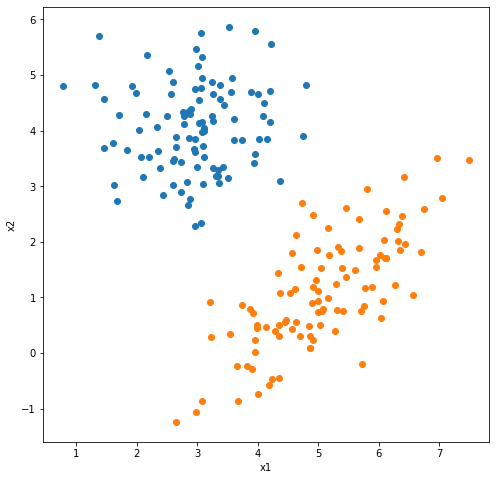

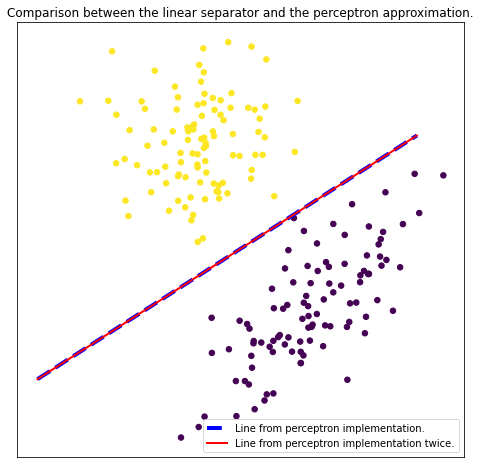

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points
np.random.seed(8)
N = 100

mean = [3,4]
cov = [[0.5, 0], [0,0.5]]  # diagonal covariance
cluster1 = np.random.multivariate_normal(mean, cov, N).T

mean = [5,1]
cov = [[1, np.sqrt(2)/2.], [np.sqrt(2)/2.,1]]  # diagonal covariance
cluster2 = np.random.multivariate_normal(mean, cov, N).T

plt.scatter(cluster1[0,:],cluster1[1,:])
plt.scatter(cluster2[0,:],cluster2[1,:])

# Linearly separate the points by the line
xn = np.concatenate((cluster1,cluster2),1)
yn = np.zeros([2*N,1]);
yn[0:N] = 1
yn[N:] = -1
xn = np.transpose(xn)

plt.xlabel('x1')
plt.ylabel('x2')

def perceptron(xn,yn,MaxIter=100,w=np.zeros(3)):
    N = xn.shape[0]
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in range(MaxIter):
        i = np.random.randint(N)
        if(yn[i] != f(xn[i,:])): 
             w[0] = w[0] + yn[i]
             w[1] = w[1] + yn[i]*xn[i,0]
             w[2] = w[2] + yn[i]*xn[i,1]
    return w
    
np.random.seed(55)
w = perceptron(xn,yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2]
anew = -w[1]/w[2]
y = lambda x: anew * x + bnew

np.random.seed(60)
w2= perceptron(xn,yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w2[0]/w2[2]
anew = -w2[1]/w2[2]
y2 = lambda x: anew * x + bnew

# Computing the colors for the points
sep_color = (yn+1)/2.0

plt.figure()
figa = plt.gca()
x_axis = np.linspace(0,7,100)
plt.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
plt.plot(x_axis,y(x_axis),'b--',lw=4,label='Line from perceptron implementation.')
plt.plot(x_axis,y2(x_axis),'r-',lw=2,label='Line from perceptron implementation twice.')
plt.legend()

plt.title('Comparison between the linear separator and the perceptron approximation.')

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)

plt.xlabel('x1')
plt.ylabel('x2')

Not bad, right? The algorithm should have managed to converge to a good approximation of the separating line. If it didn't, try running the last piece of code again. Remember that this implementation updates randomly picked points, so in some cases convergence will be worse. Also, note that the line that separates the points is not unique, given the dataset we have available. Would it be so if we had all of the possible information? My guess is that this depends on the data.

In any case, it can be proven that this process works every time, given a sufficient number of steps. This assumes that the data is linearly separable, a fact that is quite powerful on its own. We may be good at finding patterns in ℝ2 but what about ℝ𝑑? Is there a way to show that a collection of points can be separated by "inserting" planes between them? We take a look at that next.

# Not linearly seperable case

If the data is not separable by a line, then, in most cases, this process will not work perfectly. Some points will be classified correctly and some will not. Then, we can think about two more questions.

    1. How much will it cost us if we missclassify a point? Is the cost an extra spam e-mail in our inbox or is it a patient not getting the correct medicine?
    2. If we don't want to take the risk with a line, which is the best curve to use instead?

We are not going to answer those here. Instead, I will just show you an example where the classification can fail, if the points are not separable by a line. Then, if you download this notebook, you can try with other curves and see what happens.

Remember that, in our case, given a point 𝑥=(𝑥1,𝑥2), classification is done according to sign(𝑓(𝑥1)−𝑥2), which can either be -1 or 1.

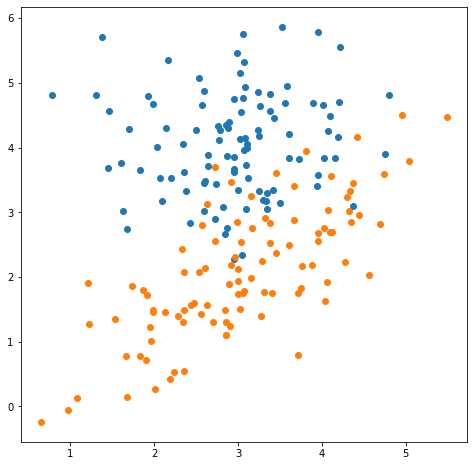

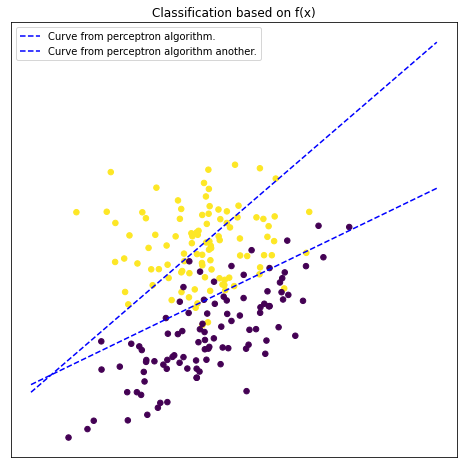

In [5]:
nr.seed(8)
N = 100

mean = [3,4]
cov = [[0.5, 0], [0,0.5]]  # diagonal covariance
cluster1 = np.random.multivariate_normal(mean, cov, N).T

mean = [3,2]
cov = [[1, np.sqrt(2)/2.], [np.sqrt(2)/2.,1]]  # diagonal covariance
cluster2 = np.random.multivariate_normal(mean, cov, N).T

# Linearly separate the points by the line
xn = np.concatenate((cluster1,cluster2),1)
yn = np.zeros([2*N,1])
yn[0:N] = 1
yn[N:] = -1
xn = np.transpose(xn)

# Try percepton with that data.
w = perceptron(xn,yn,MaxIter=1000)

# Re-scale the weights to construct a new representation
bnew = -w[0]/w[2]
anew = -w[1]/w[2]
y = lambda x: anew * x + bnew

w2 = perceptron(xn,yn,MaxIter=1000)

# Re-scale the weights to construct a new representation
bnew2 = -w2[0]/w2[2]
anew2 = -w2[1]/w2[2]
y2 = lambda x: anew2 * x + bnew2

# Computing the colors for the points
sep_color = (yn+1)/2.0

plt.figure()
figa = pl.gca()
x_axis = np.linspace(0,7,100)
plt.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
plt.title('Classification based on f(x)')

plt.plot(x_axis,y(x_axis),'b--',label = 'Curve from perceptron algorithm.')
plt.plot(x_axis,y2(x_axis),'b--',label = 'Curve from perceptron algorithm another.')
plt.legend()

figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)
